In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
dataset=pd.read_csv(r'/content/drive/My Drive/datasets/Tensorflow  community challenge /Datasets /ratings data/ratings.csv')
dataset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [0]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['num_mfr']=encoder.fit_transform(dataset['mfr'])
dataset['num_type']=encoder.fit_transform(dataset['type'])
dataset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,num_mfr,num_type
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,3,0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,5,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,2,0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,2,0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,1,0
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,1,0
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,6,0
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,1,0


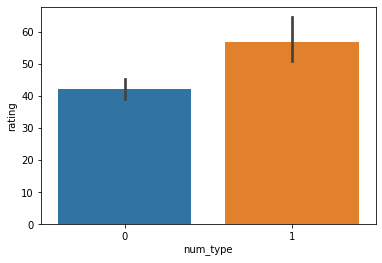

In [0]:
sns.barplot(x='num_type',y='rating',data=dataset)

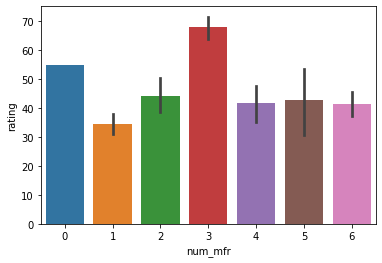

In [0]:
sns.barplot(x='num_mfr',y='rating',data=dataset)

In [0]:
training_data=dataset.drop(['name','mfr','type'],axis=1)
target=dataset.pop('rating')

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(training_data,target,test_size=0.2,random_state=20)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, r2_score

In [0]:
def custom_metric(target_test, target_predicted):
    # Calculate r-squared score
    r2 = r2_score(target_test, target_predicted)
    # Return r-squared score
    return r2

In [0]:
classifier = Ridge()
model = classifier.fit(x_train, y_train)
score = make_scorer(custom_metric, greater_is_better=True)
score(model, x_test, y_test)

0.9999998967694335

In [0]:
target_predicted = model.predict(x_test)
r2_score(y_test, target_predicted)

0.9999998967694335

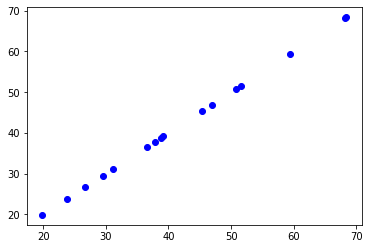

In [0]:
plt.scatter(y_test, target_predicted,c='b')